In [1]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy import stats
from statistics import mode
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

from skimage.transform import downscale_local_mean #For binning
from skimage.filters import threshold_otsu, threshold_local

import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
from statistics import median
from statistics import mode

import sys
#sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
#import ddm_analysis_and_fitting as ddm   

import tiff_file 

import io 
import sys
import csv

from PIL import Image

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data
### usually this block prints out "nd2reader module not found. Reading of .nd2 files disabled." on the first run
### this is fine (unless you need to read .nd2 files), just re-run this block to make the error go away

C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
def show_raw_images(row, ax, i, frame_key):
    plt.gray()
    index_add = arr_length * (row -1)
    if time_array[i] == 0:
        image = np.zeros((1440,1920))
        ax.set_title('[no image]', fontsize=10)
    else:
        image = tiff_file.imread(files[i+index_add],key=[frame_key])
        ax.set_title("~" + str(time_array[i]) + " hrs (row"+str(row)+") -->", fontsize=10)
    ax.imshow(image) #cmap = 'gray'
    ax.axis('off')
    plt.tight_layout(pad=.2)
    
def show_image_histograms(row, ax, i, frame_key):
    index_add = arr_length * (row -1)
    if time_array[i] == 0:
        plot = np.zeros((1440,1920))
        ax.set_title('[no image]', fontsize=10)
        ax.imshow(plot, cmap = 'gray')
    else:
        raw_image = tiff_file.imread(files[i+index_add],key=[frame_key])
        #ax.set_title("~" + str(time_array[i]) + " hrs (row"+str(row)+") --> threshold", fontsize=10)
        ax.hist(raw_image.ravel(), bins="auto")
    #ax.axis('off')
    plt.tight_layout(pad=.2)
    
def all_pixel_values(frame_key, i):
    all_vals_list = []
    time_index = i
    for l in range(len(files_list)):
        list_to_add = files_list[l]
        if l < 2:
            for j in range(0,54, 9):
                #print(list_to_add[j])
                im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
                im_ravel = filtimage_and_hist(im_array, 1000)
                all_vals_list.extend(im_ravel)
        else:
            for j in range(0,26, 9):
                #print(list_to_add[j+time_index])
                im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
                im_ravel = filtimage_and_hist(im_array, 1000)
                all_vals_list.extend(im_ravel)
    #print(len(all_vals_list))
    return all_vals_list
    
def zerolistmaker(n):
    listofzeros = ['none found'] * n
    return listofzeros

def filtimage_and_hist(image, filtersize):
    image = (image*1.0) - ((uf(image,filtersize))*1)  #(image) - unifrom-filtered(image) subtracts background
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im


In [4]:
directory = "Z"
exp1 = "9-5-22_s1_theBigOne"
exp2 = "9-5-22_s2_theBigOne"
exp3 = "10-15-22_s1_theBigOne2"
exp4 = "10-15-22_s2_theBigOne2"
### "data_dir" is the pathway to the folder holding the tiff files to be analyzed 
data_dir_95_s1 = directory+":\\Gregor L\\__Kai Colloids\\"+exp1+"\\all tiff files\\" 
data_dir_95_s2 = directory+":\\Gregor L\\__Kai Colloids\\"+exp2+"\\all tiff files\\" 
data_dir_1015_s1 = directory+":\\Gregor L\\__Kai Colloids\\"+exp3+"\\all tiff files\\" 
data_dir_1015_s2 = directory+":\\Gregor L\\__Kai Colloids\\"+exp4+"\\all tiff files\\" 
data_saveto = directory+":\\Gregor L\\__Kai Colloids\\pixel intensity analysis\\" #bottom_row_t01\\
svg_saveto = directory+":\\Gregor L\\__Kai Colloids\\pixel intensity analysis\\svg files\\" #bottom_row_t01\\

files_1015_s1 = glob.glob(data_dir_1015_s1+"*_t*")  
files_1015_s2 = glob.glob(data_dir_1015_s2+"*_t*") 
add_zeros = zerolistmaker((len(files_1015_s1)*2))
files_95_s1 = glob.glob(data_dir_95_s1+"*_t*")
files_95_s1.extend(add_zeros)
files_95_s2 = glob.glob(data_dir_95_s2+"*_t*") 
files_95_s2.extend(add_zeros)
#print("found %i files" % len(files_95_s1))
print (' \t'+ exp1 + ' \t' + exp2 + ' \t' + exp3 + ' \t' + exp4)
for i,f in enumerate(files_1015_s1): 
    print (' %i \t %s \t\t %s \t\t %s \t\t %s' % (i, f.split('\\')[-1], files_1015_s2[i].split('\\')[-1], 
                                files_95_s1[i].split('\\')[-1], files_95_s2[i].split('\\')[-1]))

 	9-5-22_s1_theBigOne 	9-5-22_s2_theBigOne 	10-15-22_s1_theBigOne2 	10-15-22_s2_theBigOne2
 0 	 row1_t1.tif 		 row1_t1.tif 		 row1_t01.tif 		 row1_t01.tif
 1 	 row1_t2.tif 		 row1_t2.tif 		 row1_t02.tif 		 row1_t02.tif
 2 	 row1_t3.tif 		 row1_t3.tif 		 row1_t03.tif 		 row1_t03.tif
 3 	 row1_t4.tif 		 row1_t4.tif 		 row1_t04.tif 		 row1_t04.tif
 4 	 row1_t5.tif 		 row1_t5.tif 		 row1_t05.tif 		 row1_t05.tif
 5 	 row1_t6.tif 		 row1_t6.tif 		 row1_t06.tif 		 row1_t06.tif
 6 	 row1_t7.tif 		 row1_t7.tif 		 row1_t07.tif 		 row1_t07.tif
 7 	 row1_t8.tif 		 row1_t8.tif 		 row1_t08.tif 		 row1_t08.tif
 8 	 row1_t9.tif 		 row1_t9.tif 		 row1_t09.tif 		 row1_t09.tif
 9 	 row2_t1.tif 		 row2_t1.tif 		 row2_t01.tif 		 row2_t01.tif
 10 	 row2_t2.tif 		 row2_t2.tif 		 row2_t02.tif 		 row2_t02.tif
 11 	 row2_t3.tif 		 row2_t3.tif 		 row2_t03.tif 		 row2_t03.tif
 12 	 row2_t4.tif 		 row2_t4.tif 		 row2_t04.tif 		 row2_t04.tif
 13 	 row2_t5.tif 		 row2_t5.tif 		 row2_t05.tif 		 row2_t05.tif
 14 	 row

In [6]:
frame_names = ["1-3 kA-WT", "WT (no kA)", "EA KaiC", "AE KaiC"]
### array containing the name for each frame in a tiff file to be run 
### e.g. frame 1 is an image of the "50% bKaiB" condition, frame 2 is an image of the "35% bKaiB" condition, etc.

total_rows = 6

time_array = [1, 4, 7, 10, 14, 18, 21, 25, 28]
#s1 [1.1, 4.0, 7.4, 10.3, 14.7, 17.7, 20.3, 23.8, 27.0]
#s2 [1.2, 4.4, 7.8, 10.8, 15.2, 18.3, 20.8, 24.3, 28.0]
### array containing the time points corresponding to consecutive tiff files
### e.g. tiff files "bottom_row_t1", "middle_row_t1", and "top_row_t1" all correspond to t = 0.5 hrs, time_array[0]

pixel_size = 0.364 # 4*0.091 = 0.364
### pixel size (microns per pixel) of frames/ images in the tiff files --- 40x olympus objective => 0.091 um/px
### IF 2x2 BINNING: multiply the original pixel size by 2^2 = 4, e.g. 4*(0.091 um/px) = 0.364 um/px

fig_size = 10,10/1.618
###  size of output figures
font_size = 10
### font size
dpi_num = 600
### image quality level (recommendation: 600)

eg_im= tiff_file.imread(files_1015_s1[0])
print("tiff file dimensions: "+ str(eg_im.shape))

num_times = int((len(files_1015_s1))/total_rows)
print("total number of time points: "+ str(num_times))
if num_times % 2 == 0:
    num_rows = int(num_times/2)
else:
    num_rows = int((num_times+1)/2)
print("(for image previews) number of rows = " + str(num_rows))



tiff file dimensions: (5, 1440, 1920)
total number of time points: 9
(for image previews) number of rows = 5


In [7]:
bins_num = 5000 #int(49766400 / 100000)

all_counts = np.zeros((num_times, bins_num))
all_bins = np.zeros((num_times, bins_num))

AE_all_probs = np.zeros((num_times, bins_num))
EA_all_probs = np.zeros((num_times, bins_num))
WTkA_all_probs = np.zeros((num_times, bins_num))
WTnokA_all_probs = np.zeros((num_times, bins_num))
AE_all_bins = np.zeros((num_times, bins_num+1))
EA_all_bins = np.zeros((num_times, bins_num+1))
WTkA_all_bins = np.zeros((num_times, bins_num+1))
WTnokA_all_bins = np.zeros((num_times, bins_num+1))

print("pixels per bin " +  str(int(49766400/bins_num)))
all_FWHM = [0.0]*num_times

pixels per bin 9953


In [8]:
list_length = 49766400
means = np.zeros((4,num_times))
medians = np.zeros((4,num_times))
modes = np.zeros((4,num_times))
std_devs = np.zeros((4,num_times))
WTkA_pixel_val = np.zeros((num_times, list_length))
WTnokA_pixel_val = np.zeros((num_times, list_length))
EA_pixel_val = np.zeros((num_times, list_length))
AE_pixel_val = np.zeros((num_times, list_length))

In [ ]:
for i in range(num_times):
    all_times_all_values[i] = all_pixel_values(0, i)
    #means[frame_key][i] = sum(all_times_all_values[i]) / len(all_times_all_values[i])
    #medians[frame_key][i] = median(all_times_all_values[i])
    #modes[frame_key][i] = mode(all_times_all_values[i])
    #std_devs[frame_key][i] = np.std(all_times_all_values[i])
    

In [9]:
files_list = [files_1015_s1, files_1015_s2, files_95_s1, files_95_s2]

for i in range(num_times):
    #all_times_all_values[i] = all_pixel_values(frame_key, i)
    WTkA_pixel_val[i] = all_pixel_values(0, i)
    #means[0][i] = sum(WTkA_pixel_val[i]) / len(WTkA_pixel_val[i])
    #WTnokA_pixel_val[i] = all_pixel_values(1, i)
    EA_pixel_val[i] = all_pixel_values(2, i)
    AE_pixel_val[i] = all_pixel_values(3, i)
    #WTkA_all_probs[i], WTkA_all_bins[i] = np.histogram(all_pixel_values(0, i), bins=bins_num, density = True)
    #WTnokA_all_probs[i], WTnokA_all_bins[i] = np.histogram(all_pixel_values(1, i), bins=bins_num, density = True)
    #EA_all_probs[i], EA_all_bins[i] = np.histogram(all_pixel_values(2, i), bins=bins_num, density = True)
    #AE_all_probs[i], AE_all_bins[i] = np.histogram(all_pixel_values(3, i), bins=bins_num, density = True)


print(len(AE_all_bins[0]))

5001


In [86]:
all_pixel_vals_dict = {}
all_pixel_vals_dict["WTkA_pixel_val"] = WTkA_pixel_val
all_pixel_vals_dict["EA_pixel_val"] = EA_pixel_val
all_pixel_vals_dict["AE_pixel_val"] = AE_pixel_val
print(AE_pixel_val[0][3000])

209.0


In [87]:
file_title = "all_pixel_vals_dict"
with open(file_title+".pkl", 'wb') as f:
    pickle.dump(all_pixel_vals_dict, f)

In [89]:
file_title = "all_pixel_vals_dict"
with open(file_title+".pkl", "rb" ) as f:
    all_pixel_vals_dict_reloaded = pickle.load(f)

WTkA_pixel_val = all_pixel_vals_dict_reloaded["WTkA_pixel_val"]
EA_pixel_val = all_pixel_vals_dict_reloaded["EA_pixel_val"]
AE_pixel_val = all_pixel_vals_dict_reloaded["AE_pixel_val"]
print(AE_pixel_val[0][3000])

209.0


In [10]:
def show_histograms(i, ax, array):
    #print(files[i+index_add])
    if time_array[i] == 0:
        empty_im = np.zeros((1440,1920))
        ax.imshow(empty_im, cmap = 'gray')
        ax.set_title('[no image]', fontsize=10)
    else:
        ax.hist(array[i], density=True, bins=bins_num)
        titles = condition + ", t= " + str(time_array[i]) + " hrs, bins= "+str(bins_num)+")"
        ax.set_title(titles, fontsize=font_size-1)
        ax.set( ylabel='probability')
        ax.set( xlabel='pixel intensity')
        ax.set_xlim(0, 2500)
        ax.set_ylim(0, 0.0095)
        ax.tick_params(axis='both', which='major', labelsize=(font_size-3))
        ax.xaxis.get_label().set_fontsize(font_size-2)
        ax.yaxis.get_label().set_fontsize(font_size-2)
    plt.tight_layout(pad=.25)

cmap_num = (num_times*2) - 3
def stack_histograms(i, ax, array):
    #print(files[i+index_add])
    ax.hist(array[i], density=True, bins=bins_num, color=cmap(0.9-(i/cmap_num)))
    
def FWHM(X,Y):
    frac = 2 #For FWHM frac = 2, FWtenthM, frac = 10, etc
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    d = Y - (max(Y) / frac)
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    indexes = np.where(d > 0)[0]
    return abs(X[indexes[-1]] - X[indexes[0]]) #return the difference (full width)

def select_data(frame_key):
    if frame_key == 0:
        print("WT+kaiA histograms")
        #print((WTkA_all_bins[0][0:10]))  matplotlib.cm.get_cmap('Reds')
        return WTkA_pixel_val, 'm', "Wild Type KaiC" #, "+str(time)+" hrs"
    elif frame_key == 1:
        print("WT w/o kaiA histograms")
        return WTnokA_pixel_val, matplotlib.cm.get_cmap('Blues'), "WT KaiC (no KaiA), "+str(time)+" hrs"
    elif frame_key == 2:
        print("EA histograms")  #matplotlib.cm.get_cmap('Greens')
        return EA_pixel_val, 'c', "pS KaiC" #, "+str(time)+" hrs"
    elif frame_key == 3:
        print("AE histograms") #matplotlib.cm.get_cmap('Greys')
        return AE_pixel_val, 'k', "pT KaiC" #, "+str(time)+" hrs"

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    print(val)
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

In [11]:
import matplotlib.mlab as mlab
from scipy.stats import norm
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.2 #set the value globally
mpl.rcParams['mathtext.default'] = 'regular'

In [12]:
import scipy.special
import numpy as np

def factorial(num):
    return scipy.special.factorial(num)

str_equation = False
def single_schulz(x, I, z):
    if str_equation == True:
        return "(1/I) * ((z+1)**z+1) * (1/(factorial(z))) * ((x/I)**z) * np.exp((-x/I)*(z+1))" 
    else:
        return (1/I) * ((z+1)**z+1) * (1/(factorial(z))) * ((x/I)**z) * np.exp((-x/I)*(z+1))

str_equation = False
def double_schulz(x, a, x_offset, I1, z1, I2, z2):
    x = x - x_offset
    DS = (1/I1)*((z1+1)**z1+1)*(1/(factorial(z1)))*((x/I1)**z1)*np.exp((-x/I1)*(z1+1)) + (1/I2)*((z2+1)**z2+1)*(1/(factorial(z2)))*((x/I2)**z2)*np.exp((-x/I2)*(z2+1))
    return a*np.nan_to_num(DS)

def gauss_exp(x, x_offset, a1, a2, xmean1, xmean2, sigma1, sigma2):
    x = x - x_offset
    ge = a1*np.exp(-1*(x-xmean1)**2 / sigma1) + a2*np.exp(-(x-xmean2)/sigma2)
    return ge

def gauss(x, x_offset, a1, xmean1, sigma1):
    x = x - x_offset
    ge = a1*np.exp(-1*(x-xmean1)**2 / sigma1) 
    return ge

fit_line_color = 'red'
print(factorial(6))
print(single_exponential(1, 1, 1))

720.0


NameError: name 'single_exponential' is not defined

<IPython.core.display.Javascript object>


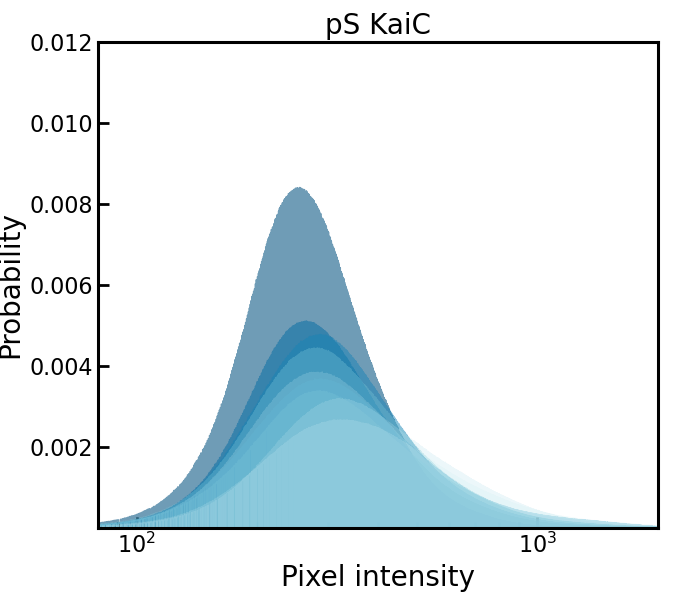

EA histograms


In [85]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='both', direction='in', which='major', length=8, width=2, labelsize=font_size-4)
ax.tick_params(axis='both', direction='in', which='minor', length=4, width=2, labelsize=font_size-4)
ax.set_xscale("log")

bins_num = 5000
#EA --> 3600
#WT --> 3050
#AE --> 2550
linew2 = 2
mark = '^'
msize = 5
linew = 4
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 0 #0.02*time_key + add/10
labels = []
patches = []
ol_patches = []

fk = 2

pixel_vals, cmap, data_label = select_data(fk)
title = data_label
#cmap = (matplotlib.cm.get_cmap('spring'))(0.99)
cmap2 = matplotlib.cm.get_cmap('Blues')
for i in range(num_times):
    time = str(time_array[i]) + " hr"
    
    counts, bins, bars = ax.hist(pixel_vals[i], histtype="step", density=True, bins=bins_num, stacked=True, 
                              color=cmap2(0.995-(i*0.124)), alpha= (0.5-(i*0.04)), log=False ) #, label= data_label)
    counts, bins, bars = ax.hist(pixel_vals[i], histtype="step", density=True, bins=bins_num, stacked=True, 
                              color=cmap, alpha=(0.15-(i*0.015)), log=False )
    #ax.scatter(bins[:-1], counts, s=msize, color=cmap2(0.995-(i*0.00)), marker=mark, alpha=0.95, label= time)
    #ax.scatter(bins[:-1], counts, s=msize, color=cmap, marker=mark, alpha=(0.01+(i*0.001)))
    #ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap2(0.99-(time_key*0.120)), alpha=0.7)
    #ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap(0.99), alpha=(0.05+(time_key*0.08)))
    labels.append(time)
    #patches.append(mpatches.Patch(color=cmap2(0.995-(i*0.12)), alpha= (0.995-(i*0.09)), label= time)) 
    #ol_patches.append(mpatches.Patch(color=cmap(0.99), alpha=(0.01+(i*0.05)), label= time)) 

xmin, xmax = plt.xlim()

yticks = ax.get_yticklabels()

'''ax.axhline(all_FWtenthM[0][2][time_key], c='r')'''
#### up to 28 hrs
#WT=> 'RdPu' cmap2(0.995-(i*0.124)), alpha=0.9)   cmap, alpha=(0.45-(i*0.04))
#EA=> 'Blues'  cmap2(0.99-(i*0.124)), alpha=0.99)    cmap, alpha=(0.35-(i*0.03))
#AE=> cmap= 'spring'  cmap2= 'gist_yarg'   cmap2(0.99-(i*0.120)), alpha=0.7)   cmap(0.99), alpha=(0.05+(i*0.08))
    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel intensity', fontsize=font_size)
plt.ylim(0.000001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(80, 2000)
#plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

'''ax.legend(handles=[patch2, patch0, ol_patch1], markerscale=2., fontsize=font_size-6, #[patch2, patch0, patch1]
          loc='upper right', framealpha= 0, frameon=False)'''

'''leg1 = ax.legend(markerscale=2., fontsize=font_size-6, #[patch2, patch0, patch1]
          loc='upper right', framealpha= 0, frameon=False)
from matplotlib.legend import Legend
leg2 = Legend(ax, ol_patches, labels, markerscale=2.,      #[ol_patch2, ol_patch0, ol_patch1]
              fontsize=font_size-6, loc='upper right', framealpha= 0, frameon=False)
ax.add_artist(leg2);

for line in leg1.get_lines():
    line.set_linewidth(5.0)
    
for line in leg2.get_lines():
    line.set_linewidth(5.0)'''

plt.subplots_adjust(bottom=0.12, left=0.14, right=0.94, top=0.93)

plt.show()
fig.savefig(data_saveto+"zoomed inset - "+title+".png", dpi=600, bbox_inches ='tight')
fig.savefig(svg_saveto+"zoomed inset - "+title+".svg", dpi=800, bbox_inches ='tight')

<IPython.core.display.Javascript object>


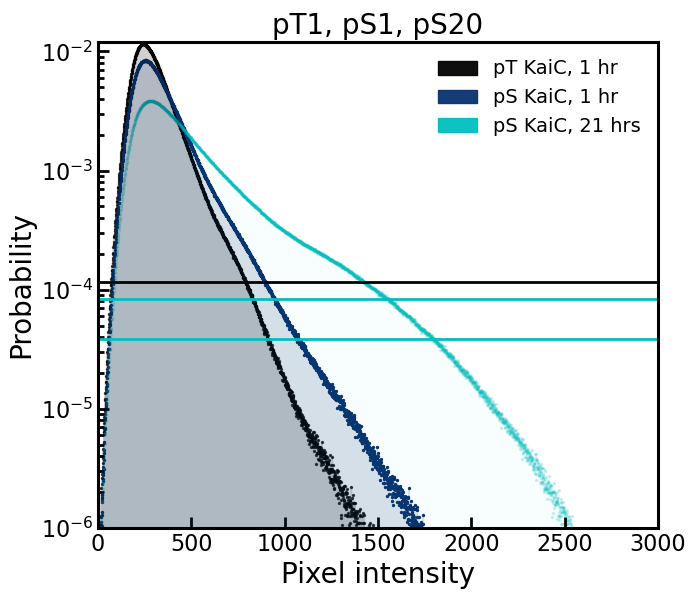

AE histograms
EA histograms
EA histograms


In [28]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='both', direction='in', which='major', length=8, width=2, labelsize=font_size-4)
ax.tick_params(axis='both', direction='in', which='minor', length=4, width=2, labelsize=font_size-4)
ax.set_yscale("log")
msize = 2

title = "pT1, pS1, pS20" #"pT1, pS1, pS20"
bins_num = 5000
linew2 = 2
marker = '-'
markerSize = 2
linew = 4
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 0 #0.02*time_key + add/10
labels = []

time_key = 0
fk = 3
time = str(time_array[time_key]) + " hr"
pixel_vals, cmap, data_label = select_data(fk)
cmap = matplotlib.cm.get_cmap('spring')
cmap2 = matplotlib.cm.get_cmap('gist_yarg') 
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          color=cmap2(0.99-(time_key*0.120)), alpha=0.18, log=False ) #, label= data_label)
#counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
#                          color=cmap(0.99), alpha=(0.025+(time_key*0.08)), log=False )
ax.scatter(bins[:-1], counts, s=msize, color=cmap2(0.99-(time_key*0.120)), alpha=0.7)
#ax.scatter(bins[:-1], counts, s=msize, color=cmap(0.99), alpha=(0.05+(time_key*0.08)))
#ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap2(0.99-(time_key*0.120)), alpha=0.7)
#ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap(0.99), alpha=(0.05+(time_key*0.08)))
line1 = ax.axhline(all_FWtenthM[fk][1][time_key], c='k', linewidth=linew2, label="1% max")
labels.append(data_label+", "+time)
#patch2 = mpatches.Patch(color=cmap2(0.99-(time_key*0.120)), alpha=0.7, label=data_label+", "+time)
patch2 = mpatches.Patch(color=cmap2(0.99-(time_key*0.120)), alpha=0.95, label=data_label+", "+time)
#ol_patch2 = mpatches.Patch(color=cmap(0.99), alpha=(0.05+(time_key*0.08)), label=data_label+", "+time)


time_key = 0
fk = 2
pixel_vals, cmap, data_label = select_data(fk)
cmap2 = matplotlib.cm.get_cmap('Blues') 
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          color=cmap2(0.99-(time_key*0.124)), alpha=0.15, log=False ) #, label= data_label)
#counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
#                          color=cmap, alpha=(0.04-(time_key*0.002)), log=False )
ax.scatter(bins[:-1], counts, s=msize, color=cmap2(0.99-(time_key*0.124)), alpha=0.99)
#ax.scatter(bins[:-1], counts, s=msize, color=cmap, alpha=(0.25-(time_key*0.03)))
#ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap2(0.99-(time_key*0.124)), alpha=0.99)
#ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap, alpha=(0.35-(time_key*0.03)))
ax.axhline(all_FWtenthM[fk][1][time_key], c='c', linewidth=linew2, label="1% max")
labels.append(data_label+", "+time)
#patch0 = mpatches.Patch(color=cmap2(0.99-(time_key*0.124)), alpha=0.50, label=data_label+", "+time)
patch0 = mpatches.Patch(color=cmap2(0.99-(time_key*0.124)), alpha=0.95, label=data_label+", "+time)
#ol_patch0 = mpatches.Patch(color=cmap, alpha=(0.35-(time_key*0.03)), label=data_label+", "+time)


time_key = 6
fk = 2
time = str(time_array[time_key]) + " hrs"
pixel_vals, cmap, data_label = select_data(fk)
cmap2 = matplotlib.cm.get_cmap('Blues') 
#counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
    #                      color=cmap2(0.99-(time_key*0.124)), alpha=0.15, log=False ) #, label= data_label)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          color=cmap, alpha=(0.04-(time_key*0.002)), log=False )
#ax.scatter(bins[:-1], counts, s=msize, color=cmap2(0.99-(time_key*0.124)), alpha=0.99)
ax.scatter(bins[:-1], counts, s=msize, color=cmap, alpha=(0.35-(time_key*0.03)))
#ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap2(0.99-(time_key*0.124)), alpha=0.99)
#ax.plot(bins[:-1], counts, marker, linewidth=linew, color=cmap, alpha=(0.35-(time_key*0.03)))
line2 = ax.axhline(all_FWtenthM[fk][1][time_key], c='c', linewidth=linew2)
labels.append(data_label+", "+time)
#patch1 = mpatches.Patch(color=cmap2(0.99-(time_key*0.124)), alpha=0.15, label=data_label+", "+time)
#ol_patch1 = mpatches.Patch(color=cmap, alpha=(0.45-(time_key*0.03)), label=data_label+", "+time)
ol_patch1 = mpatches.Patch(color=cmap, alpha=(0.95), label=data_label+", "+time)


xmin, xmax = plt.xlim()

yticks = ax.get_yticklabels()

'''ax.axhline(all_FWtenthM[0][2][time_key], c='r')'''
#### up to 28 hrs
#WT=> 'RdPu' cmap2(0.995-(i*0.124)), alpha=0.9)   cmap, alpha=(0.45-(i*0.04))
#EA=> 'Blues'  cmap2(0.99-(i*0.124)), alpha=0.99)    cmap, alpha=(0.35-(i*0.03))
#AE=> cmap= 'spring'  cmap2= 'gist_yarg'   cmap2(0.99-(i*0.120)), alpha=0.7)   cmap(0.99), alpha=(0.05+(i*0.08))
    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel intensity', fontsize=font_size)
plt.ylim(0.000001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 3000)
#plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

ax.legend(handles=[patch2, patch0, ol_patch1], markerscale=2., fontsize=font_size-6, #[patch2, patch0, patch1]
          loc='upper right', framealpha= 0, frameon=False)

'''ax.legend(handles=[patch2, patch0, patch1], markerscale=2., fontsize=font_size-6, #[patch2, patch0, patch1]
          loc='upper right', framealpha= 0, frameon=False)
leg2 = Legend(ax, [ol_patch2, ol_patch0, ol_patch1], labels, markerscale=2.,      #[ol_patch2, ol_patch0, ol_patch1]
              fontsize=font_size-6, loc='upper right', framealpha= 0, frameon=False)
ax.add_artist(leg2);'''

lines = [line1, line2] #[line1, line2]
line_labels = ["1% max", "1% max"] #["1% max", "1% max"]
'''leg3 = Legend(ax, lines, line_labels, markerscale=2., fontsize=font_size-6,
             loc='center right', framealpha= 1, frameon=True)
ax.add_artist(leg3);
for line in leg3.get_lines():
    line.set_linewidth(5.0)'''

plt.subplots_adjust(bottom=0.12, left=0.14, right=0.94, top=0.93)

plt.show()
fig.savefig(data_saveto+"gradient pixel intensity - "+title+".png", dpi=600, bbox_inches ='tight')
fig.savefig(svg_saveto+"gradient pixel intensity - "+title+".svg", dpi=800, bbox_inches ='tight')

In [776]:
fig.savefig(data_saveto+"2 color pixel intensity - "+title+".png", dpi=600, bbox_inches ='tight')
fig.savefig(svg_saveto+"2 color pixel intensity - "+title+".svg", dpi=800, bbox_inches ='tight')

<IPython.core.display.Javascript object>


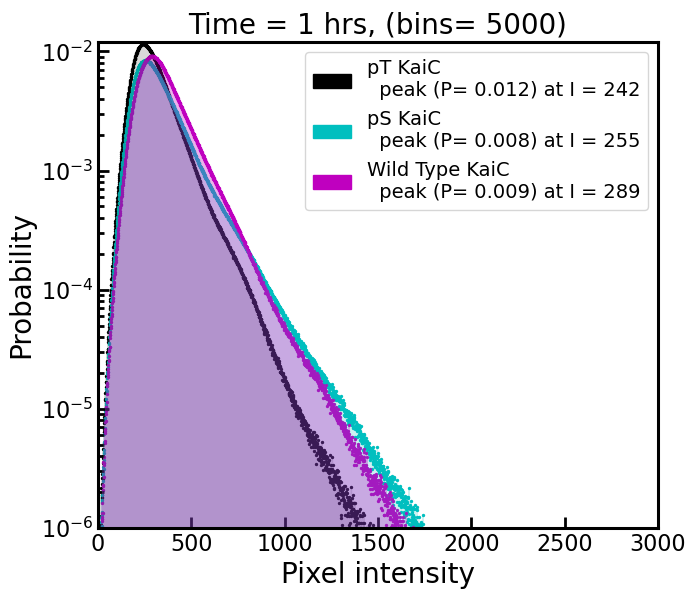

AE histograms
EA histograms
49766400
[8.25888968e-07 0.00000000e+00 1.65177794e-07 ... 0.00000000e+00
 0.00000000e+00 4.12944484e-08]
WT+kaiA histograms


In [426]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='both', direction='in', which='major', length=8, width=2, labelsize=font_size-4)
ax.tick_params(axis='both', direction='in', which='minor', length=4, width=2, labelsize=font_size-4)
ax.set_yscale("log")
msize = 2

time_key = 0
time = time_array[time_key]
title = "Time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 0 #0.02*time_key + add/10

pixel_vals, cmap, data_label = select_data(3)
#mean,std = norm.fit(pixel_vals)
#ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, color=cmap(cmap_num))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.15+ alpha_num, color=cmap )#, label= data_label)
ax.scatter(bins[:-1], counts, s=msize, alpha=1, color=cmap )
color2=cmap
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text2= "  peak (P= {:.3f}) at I = {:.0f}".format(max_prob, max_bin)
patch2 = mpatches.Patch(color=cmap, label=(data_label + "\n" + text2))

pixel_vals, cmap, data_label = select_data(2)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.2 + alpha_num, color=cmap, log=False ) #, label= data_label)
ax.scatter(bins[:-1], counts, s=msize, alpha=1, color=cmap )
print(counts)
color0=cmap
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text0= "  peak (P= {:.3f}) at I = {:.0f}".format(max_prob, max_bin)
patch0 = mpatches.Patch(color=cmap, label=data_label + "\n" + text0)

pixel_vals, cmap, data_label = select_data(0)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.3+ alpha_num, color=cmap )#, label= data_label)
ax.scatter(bins[:-1], counts, s=msize, alpha=1, color=cmap )
color1=cmap
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text1= "  peak (P= {:.3f}) at I = {:.0f}".format(max_prob, max_bin)
patch1 = mpatches.Patch(color=cmap, label=data_label + "\n" + text1)


xmin, xmax = plt.xlim()

yticks = ax.get_yticklabels()

'''ax.axhline(all_FWtenthM[0][2][time_key], c='r')
ax.axhline(all_FWtenthM[2][2][time_key], c='g')
ax.axhline(all_FWtenthM[3][2][time_key], c='k')'''
    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel intensity', fontsize=font_size)
plt.ylim(0.000001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 3000)
#plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

ax.legend(handles=[patch2, patch0, patch1], markerscale=2., fontsize=font_size-6)

plt.subplots_adjust(bottom=0.12, left=0.14, right=0.94, top=0.93)

plt.show()
fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=800, bbox_inches ='tight')
fig.savefig(svg_saveto+"logy EA, AE, WT histograms- "+title+".svg", dpi=800, bbox_inches ='tight')

In [307]:
bins_fit_arr

array([4.8660000e-01, 9.7320000e-01, 1.4598000e+00, ..., 2.4320268e+03,
       2.4325134e+03, 2.4330000e+03])

In [270]:
counts_fit_arr

array([8.25888968e-07, 0.00000000e+00, 1.65177794e-07, ...,
       0.00000000e+00, 0.00000000e+00, 4.12944484e-08])

In [14]:
np.log(0.0000001)
from numpy import errstate,isneginf,array,less

def manual_log_scale(counts, ymin):
    with errstate(divide='ignore'):
        log_counts = np.log((counts))
        log_counts2 = np.log((counts))
    log_counts2[isneginf(log_counts2)]=0
    shifted_log_counts = log_counts + (-1*np.log(ymin))  #((min(log_counts2))*-1)
    shifted_log_counts[isneginf(shifted_log_counts)]=0
    shifted_log_counts[less(shifted_log_counts,0)]=0
    return shifted_log_counts



ymax = np.log(0.012)
ymin = -1*np.log(0.000001)
print(ymax + ymin)



def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

    
zaxis_log_labels = ['0.00001', '0.0001', '0.001', '0.01']

print(len(counts))
counts = list(counts)
#[i for i, e in enumerate(counts) if e == 0]

9.392661928770137
5000


In [15]:
ymin = 0.000001
zaxis_log_ticks = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
new_ticks = manual_log_scale(zaxis_log_ticks, ymin)
print(new_ticks)
[0, 2.30258509, 4.60517019, 6.90775528]
new_labels = ["$\mathregular{10^{-5}}$", "$\mathregular{10^{-4}}$", "$\mathregular{10^{-3}}$", "$\mathregular{10^{-2}}$"]
print("{}\u00b1".format(10))
"$\mathregular{10^{-2}}$"

[0.         2.30258509 4.60517019 6.90775528 9.21034037]
10±


'$\\mathregular{10^{-2}}$'

In [16]:
ax.yaxis._axinfo?

Object `ax.yaxis._axinfo` not found.


In [17]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.2 #set the value globally
mpl.rcParams['mathtext.default'] = 'regular'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
Axis?

Object `Axis` not found.


In [18]:
def FWHM(X,Y):
    frac = 100 #For FWHM frac = 2, FWtenthM, frac = 10, etc
    peak = max(Y)
    half_max = max(Y) / frac
    #find when function crosses line half_max (when sign of diff flips)
    d = Y - (max(Y) / frac)
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    indexes = np.where(d > 0)[0]
    full_width = abs(X[indexes[-1]] - X[indexes[0]]) #return the difference (full width)
    return full_width, half_max, peak

In [19]:
all_FWtenthM = np.zeros((4, 3, num_times))
all_FWtenthM[0][0][0] = 420
all_FWtenthM[0][0][1] = 3
all_FWtenthM[0][1][0] = 2
all_FWtenthM[1][0][0] = 1
#all_FWtenthM[2][1] = 4,5,6
print(all_FWtenthM)
0.99- 8*0.1

[[[420.   3.   0.   0.   0.   0.   0.   0.   0.]
  [  2.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  1.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]]


0.18999999999999995

In [20]:
def no_zeros_manual_log_scale(counts, ymin):
    with errstate(divide='ignore'):
        log_counts = np.log((counts))
        log_counts2 = np.log((counts))
    log_counts2[isneginf(log_counts2)]=0
    shifted_log_counts = log_counts + (-1*np.log(ymin))  #((min(log_counts2))*-1)
    shifted_log_counts[isneginf(shifted_log_counts)]= np.nan
    shifted_log_counts[less(shifted_log_counts,0)]= np.nan
    #shifted_log_counts[less(shifted_log_counts,(-1*np.log(ymin)))]= np.nan
    return shifted_log_counts

<IPython.core.display.Javascript object>


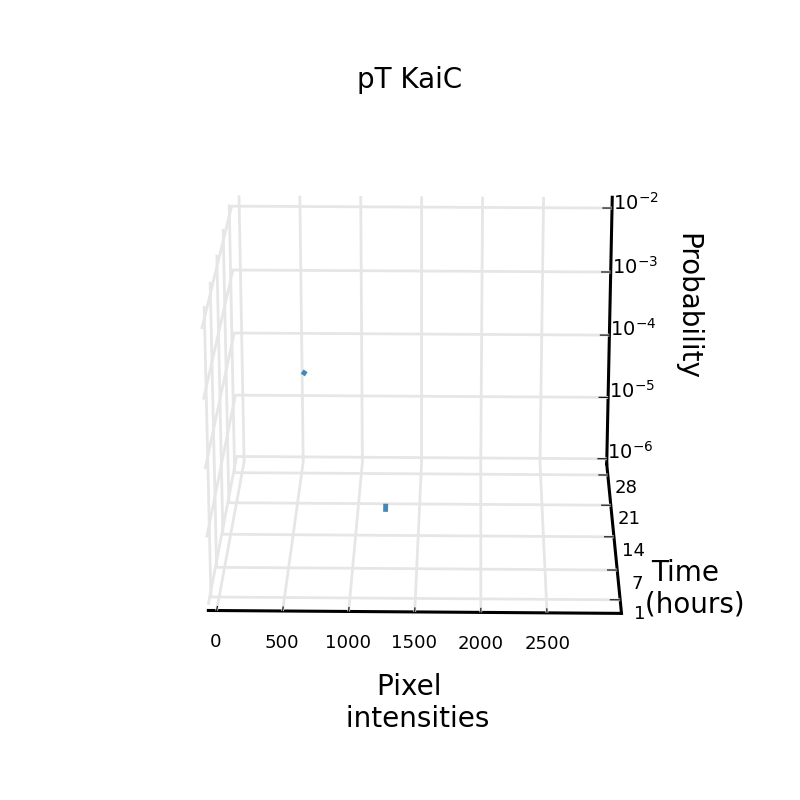

AE histograms
0 28
1 25
2 22
3 19
4 15
5 11
6 8
7 4
8 1
[[[8.31117200e+02 1.05215880e+03 1.08303200e+03 1.16460080e+03
   1.19606900e+03 1.23325440e+03 1.40366760e+03 1.45513600e+03
   1.60074320e+03]
  [9.14000310e-05 7.18623754e-05 6.79393917e-05 6.11925798e-05
   5.77788944e-05 5.52260219e-05 4.54177120e-05 4.45812566e-05
   4.10283488e-05]
  [9.14000310e-03 7.18623754e-03 6.79393917e-03 6.11925798e-03
   5.77788944e-03 5.52260219e-03 4.54177120e-03 4.45812566e-03
   4.10283488e-03]]

 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]]

 [[8.71987200e+02 1.21296100e+03 1.37922600e+03 1.63985040e+03
   1.93

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
font_size = 20
#ax.tick_params(axis='both', which='major', labelsize=font_size-7)
ax.tick_params(axis='both', direction='in', which='major', length=8, width=2, labelsize=font_size-6)
msize = 1.0

'''patch0 = mpatches.Patch(color=cmap2(0.99-(0*0.124)), alpha=0.5, label=str(time_array[0])+" hrs")
patch1 = mpatches.Patch(color=cmap2(0.99-(1*0.124)), alpha=0.5, label=str(time_array[1])+" hrs")
patch2 = mpatches.Patch(color=cmap2(0.99-(2*0.124)), alpha=0.5, label=str(time_array[2])+" hrs")
patch3 = mpatches.Patch(color=cmap2(0.99-(3*0.124)), alpha=0.5, label=str(time_array[3])+" hrs")
patch4 = mpatches.Patch(color=cmap2(0.99-(4*0.124)), alpha=0.5, label=str(time_array[4])+" hrs")
patch5 = mpatches.Patch(color=cmap2(0.99-(5*0.124)), alpha=0.5, label=str(time_array[5])+" hrs")
patch6 = mpatches.Patch(color=cmap2(0.99-(6*0.124)), alpha=0.5, label=str(time_array[6])+" hrs")
patch7 = mpatches.Patch(color=cmap2(0.99-(7*0.124)), alpha=0.5, label=str(time_array[7])+" hrs")
patch8 = mpatches.Patch(color=cmap2(0.99-(8*0.124)), alpha=0.5, label=str(time_array[8])+" hrs")

ol_patch0 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[0])+" hrs")
ol_patch1 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[1])+" hrs")
ol_patch2 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[2])+" hrs")
ol_patch3 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[3])+" hrs")
ol_patch4 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[4])+" hrs")
ol_patch5 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[5])+" hrs")
ol_patch6 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[6])+" hrs")
ol_patch7 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[7])+" hrs")
ol_patch8 = mpatches.Patch(color=cmap, alpha=0.5, label=str(time_array[8])+" hrs") '''

#plt.rcParams['grid.linewidth'] = 2
#ax.xaxis._axinfo['tickdir']=2
'''ax.xaxis._axinfo['tick']['inward_factor'] = 0.3
ax.xaxis._axinfo['tick']['outward_factor'] = 0.0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.0
ax.zaxis._axinfo['tick']['outward_factor'] = 0.3'''
#ax.yaxis._axinfo['tickdir']=0
#ax.zaxis._axinfo['grid']['linewidth']=2
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.grid(True)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis._axinfo['axisline']['linewidth'] = 3
    #axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 2.0
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0.9, 0.9, 0.9)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.3
    #axis.set_pane_color((0.95, 0.95, 0.95))

ax.xaxis.set_rotate_label(False)
ax.set_xlabel('Pixel \n intensities', rotation = 0, fontsize=font_size, labelpad= 25.0)
ax.set_xlim(0, 3000)

new_xticks = [0, 500, 1000, 1500, 2000, 2500]
new_xtick_labels = ["0", "500", "1000", "1500", "2000", "2500"]
ax.set_xticks(new_xticks)
ax.set_xticklabels(new_xtick_labels)
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
ax.xaxis.set_major_formatter(FixedFormatter(new_xtick_labels))
ax.set_xticklabels(ax.get_xticklabels(),ha='center', fontsize = font_size-7)

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Probability', rotation = -90, fontsize=font_size, labelpad= 30.0, ha="center")
ax.set_zlim(0, 9.4)

zaxis_log_labels = ["  $\mathregular{10^{-6}}$","  $\mathregular{10^{-5}}$", "  $\mathregular{10^{-4}}$", "  $\mathregular{10^{-3}}$", "  $\mathregular{10^{-2}}$"]
new_zticks = [0, 2.30258509, 4.60517019, 6.90775528, 9.21034037] #0, 2.30258509, 4.60517019, 6.90775528
ax.set_zticks(new_zticks)
ax.set_zticklabels(zaxis_log_labels)
ax.zaxis.set_major_locator(FixedLocator(ax.get_zticks()))
ax.zaxis.set_major_formatter(FixedFormatter(zaxis_log_labels))
ax.set_zticklabels(ax.get_zticklabels(),ha='center', va='center')

ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_ylabel('Time \n (hours)', rotation = 0, fontsize=font_size, labelpad= 25.0, ha='center', va='bottom') 

new_yticks = [2, 8, 15, 22, 29]
new_ytick_labels = ["1", "7", "14", "21", "28"]
ax.set_yticks(new_yticks)
ax.set_yticklabels(new_ytick_labels)
ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
ax.yaxis.set_major_formatter(FixedFormatter(new_ytick_labels))
ax.set_yticklabels(ax.get_yticklabels(),ha='center', va='center', fontsize = font_size-7)
ax.set_ylim(0, 31)
    
frame_key = 3
bins_num = 5000
#EA --> 3600
#WT --> 3050
#AE --> 2550
cmap2 = matplotlib.cm.get_cmap('Blues')
#WT=> 'RdPu' cmap2(0.003+(i*0.124)), alpha=0.799+(i*0.025))   cmap, alpha=(0.12+(i*0.05)))
#EA=> 'Blues'  cmap2(0.006+(i*0.123)), alpha=0.95)    cmap, alpha=(0.25-(i*0.03)))
#AE=> cmap= 'spring'  cmap2= 'gist_yarg'   cmap2, alpha=(0.991-(i*0.01)))   cmap(0.023+(i*0.1215)), alpha=0.635+(i*0.045))
condition = frame_names[frame_key]
pixel_vals, cmap, data_label = select_data(frame_key)
#cmap2 = (matplotlib.cm.get_cmap('spring'))(0.99)
#cmap = matplotlib.cm.get_cmap('gist_yarg')
title = data_label 
all_counts = np.zeros((num_times, bins_num))
all_bins = np.zeros((num_times, bins_num))

marker = '-'
markerSize = 2
linew = 3.5

zmin = 0.000001
time_arr = []
for i,t in enumerate(time_array):
    print(i,29-t)
    #print(pixel_vals[8-i][10])
    #time = str(i)+" hrs"
    time = str(time_array[i])+" hrs"
    time_arr.append(time)
    counts, bins = np.histogram(pixel_vals[8-i], bins=bins_num, density = True)
    counts2, bins2 = np.histogram(pixel_vals[i], bins=bins_num, density = True)
    full_width, half_max, peak = FWHM(bins2[:-1], counts2)
    #logscaled_counts = manual_log_scale(counts, zmin)
    counts = no_zeros_manual_log_scale(counts, zmin)
    counts2 = no_zeros_manual_log_scale(counts2, zmin)
    #counts = np.ma.masked_where(counts <= 0, counts)
    
    ax.plot(bins[:-1], counts, zs=(29-t), zdir='y', linewidth=linew,c=cmap2(0.006+(i*0.123)), alpha=0.95)
    ax.plot(bins[:-1], counts, zs=(29-t), zdir='y', linewidth=linew,c=cmap, alpha=(0.25-(i*0.03)))
    
    '''ax.add_collection3d(plt.fill_between(bins2[:-1],counts2,0,
                                         color=cmap2(0.99-(i*0.123)), alpha=0.2),zs=(t), zdir='y')
    ax.add_collection3d(plt.fill_between(bins2[:-1],counts2,0,
                                         color=cmap, alpha=(0.25-(i*0.03))),zs=(t), zdir='y')'''
    
    #ax.scatter(bins[:-1],counts,zs=(8-i),zdir='y', s=msize, marker='s', c=cmap2(0.99-(i*0.123)), alpha=0.35), 
    #ax.scatter(bins[:-1],counts,zs=(8-i),zdir='y', s=msize+1, marker='s', c=cmap, alpha=0.04)

    #ax.plot(bins[:-1], counts, zs=(t), zdir='y', linewidth=linew,c=cmap2(0.99-(i*0.123)), alpha=0.99)
    #ax.plot(bins[:-1], counts, zs=(t), zdir='y', linewidth=linew,c=cmap, alpha=(0.35-(i*0.03)))
    
    '''all_counts[i] = counts2 
    all_bins[i] = bins2[:-1]
    all_FWtenthM[frame_key][0][i] = full_width
    all_FWtenthM[frame_key][1][i] = half_max
    all_FWtenthM[frame_key][2][i] = peak'''
    

print(all_FWtenthM)


ax.set_title(title, fontsize=font_size)
ax.view_init(elev=20, azim=-89)
#elev=14, azim=-80
#elev=4, azim=-70
#elev=1, azim=-75
#elev=15, azim=-50
#elev=20, azim=-89
'''leg1 = ax.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8], 
                 markerscale=8., loc="upper center",ncol=3, borderaxespad=0.5, fontsize=font_size-7, 
                 framealpha= 0, frameon=False) 
from matplotlib.legend import Legend
leg2 = Legend(ax, handles=[ol_patch0,ol_patch1,ol_patch2,ol_patch3,ol_patch4,ol_patch5,ol_patch6,ol_patch7,ol_patch8],
              labels=time_arr, markerscale=8., loc="upper center",ncol=3, borderaxespad=0.5, fontsize=font_size-7,
              framealpha= 0, frameon=False)
ax.add_artist(leg2);'''

plt.show()
#fig.savefig(data_saveto+"option5 3D px distribution - "+title+".png", dpi=600)
#fig.savefig(svg_saveto+"option1 3D px distribution - "+title+".svg", dpi=800)

In [ ]:
ax.plot(bins[:-1], counts, zs=(29-t), zdir='y', linewidth=linew,c=cmap2(0.023+(i*0.1215)), alpha=0.635+(i*0.045))
    ax.plot(bins[:-1], counts, zs=(29-t), zdir='y', linewidth=linew,c=cmap, alpha=(0.991-(i*0.01)))

<IPython.core.display.Javascript object>


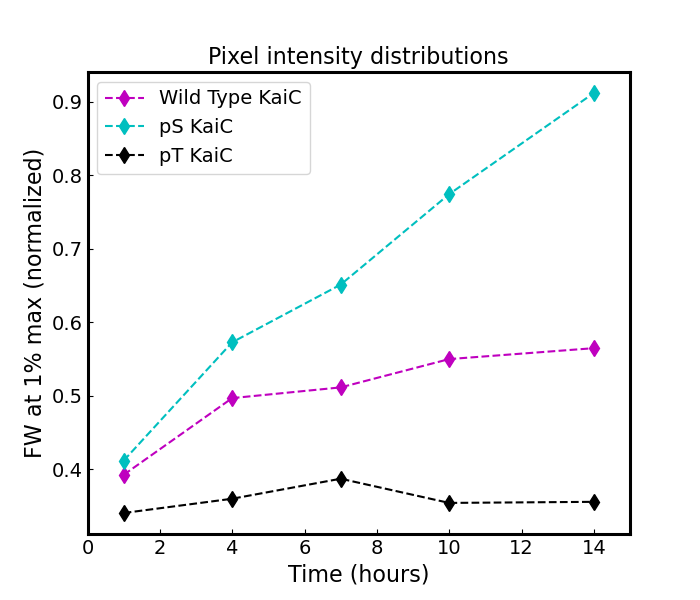

WT+kaiA histograms
EA histograms
AE histograms


In [839]:
%matplotlib notebook
cmap_num = (num_times*2) - 2
fig, ax = plt.subplots(figsize=(7,6))

this_plot = 'FW at 1% max (normalized)'  #FW at 1% max (beads per cluster)
#'mean cluster size ($\mu$m$^{{2}}$)'  #'clusters found (number)' #'FW at 10% max ($\mu$m$^{{2}}$)'
this_plot_s = '0-14_' + this_plot

end_index = 5
y_array = all_FWtenthM  #all_nums[fk,i], all_means[fk,i], all_medians[fk,i], all_modes[fk,i], all_FWs[fk,i]
#all_cSize_at_half[fk]
#y_stdE = modes_stdE   #nums_stdE[fk,i],means_stdE[fk,i],medians_stdE[fk,i],modes_stdE[fk,i],FWs_stdE[fk,i]
s_time_array = time_array[:end_index]
px_per_b = 1 #95

#ax.set_ylim(2, 21)
ax.set_xlim(0, 15)
#ax.set_yscale("log")
marker = '--d'
markerSize = 8
font_size = 16
cmap_num = 0.6
#threshold_details = " (clusters >= "+str(beads_per_cluster)+" beads)"
title = "Pixel intensity distributions" 

ax.set_title(title, fontsize= (font_size))
plt.ylabel(this_plot, fontsize=font_size)
plt.xlabel('Time (hours)', fontsize=font_size)
ax.tick_params(axis='both', direction='in', which='major', labelsize=font_size-2)
ax.tick_params(axis='both', direction='in', which='minor', labelsize=font_size-2)

max_val = max(y_array[2][0])

fk = 0
pixel_vals, cmap, data_label = select_data(fk)
normalized_y = []
for i in range(len(s_time_array)):
    normalized_y = (y_array[fk][0][:end_index])/max_val
ax.plot(s_time_array, normalized_y, marker, ms=markerSize, c=cmap, label = data_label)
#ax.errorbar(s_time_array, (y_array[fk][:end_index])/px_per_b, yerr = (y_stdE[fk][:end_index])/px_per_b, fmt = 'none', 
            #ecolor=cmap, capsize=10)
fk = 2
pixel_vals, cmap, data_label = select_data(fk)
normalized_y = []
for i in range(len(s_time_array)):
    normalized_y = (y_array[fk][0][:end_index])/max_val
ax.plot(s_time_array, normalized_y, marker, ms=markerSize, c=cmap, label = data_label)
#ax.errorbar(s_time_array, (y_array[fk][:end_index])/px_per_b, yerr = (y_stdE[fk][:end_index])/px_per_b, fmt = 'none', 
           # ecolor=cmap, capsize=10)
fk = 3
pixel_vals, cmap, data_label = select_data(fk)
normalized_y = []
for i in range(len(s_time_array)):
    normalized_y = (y_array[fk][0][:end_index])/max_val
ax.plot(s_time_array, normalized_y, marker, ms=markerSize, c=cmap, label = data_label)
#ax.errorbar(s_time_array, (y_array[fk][:end_index])/px_per_b, yerr = (y_stdE[fk][:end_index])/px_per_b, fmt = 'none', 
            #ecolor=cmap, capsize=10)

plt.show()
ax.legend(fontsize=font_size-2)
#threshold_details = " (clusters AL "+str(beads_per_cluster)+" beads, bsize= "+str(block_size)+", offset= "+str(offset_val)+")"
fig.savefig(data_saveto+this_plot_s+title+".png", dpi=800)
fig.savefig(svg_saveto+this_plot_s+title+".svg", dpi=800)

In [549]:
print(all_FWtenthM[0][:][0])
patches1 = []
    
patch0 = mpatches.Patch(color=cmap2(0.99-(0*0.124)), alpha=0.5, label=str(time_array[0])+" hrs")
patch1 = mpatches.Patch(color=cmap2(0.99-(1*0.124)), alpha=0.5, label=str(time_array[1])+" hrs")
patch2 = mpatches.Patch(color=cmap2(0.99-(2*0.124)), alpha=0.5, label=str(time_array[2])+" hrs")
patch3 = mpatches.Patch(color=cmap2(0.99-(3*0.124)), alpha=0.5, label=str(time_array[3])+" hrs")
patch4 = mpatches.Patch(color=cmap2(0.99-(4*0.124)), alpha=0.5, label=str(time_array[4])+" hrs")
patch5 = mpatches.Patch(color=cmap2(0.99-(5*0.124)), alpha=0.5, label=str(time_array[5])+" hrs")
patch6 = mpatches.Patch(color=cmap2(0.99-(6*0.124)), alpha=0.5, label=str(time_array[6])+" hrs")
patch7 = mpatches.Patch(color=cmap2(0.99-(7*0.124)), alpha=0.5, label=str(time_array[7])+" hrs")
patch8 = mpatches.Patch(color=cmap2(0.99-(8*0.124)), alpha=0.5, label=str(time_array[8])+" hrs")

[ 831.1172 1052.1588 1083.032  1164.6008 1196.069  1233.2544 1403.6676
 1455.136  1600.7432]


<IPython.core.display.Javascript object>


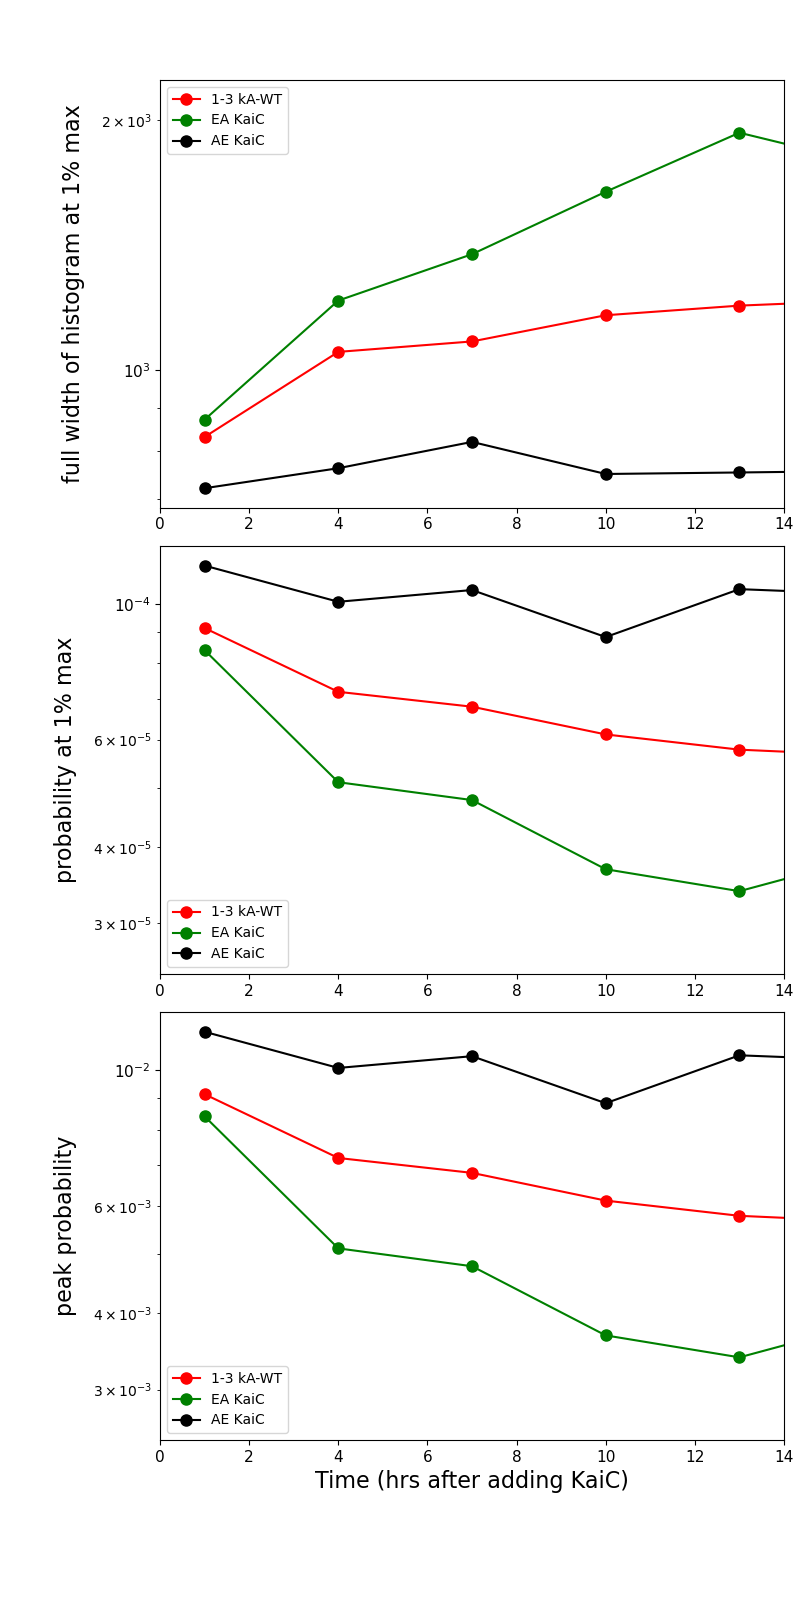

In [232]:
### plot average values and std. error for L1 correlation lengths
cmap_num = (num_times*2) - 2
fig_size = 9.5, 20   #20/1.618
fig = plt.figure(figsize=(8,16))
gs = fig.add_gridspec(3, top=0.95, hspace=0.09)
axs = gs.subplots(sharex=False, sharey=False)
#fig, axs = plt.subplots(3, figsize=(fig_size))

#all_FWtenthM[frame_key][i] = (full_width, log_half_max, real_half_max)
markerSize = 8
font_size = 16
title = condition 

#ylim = 200, 650

#axs[0].set_title(title, fontsize= (font_size))
axs[0].set( ylabel='full width of histogram at 1% max')
#axs[0].set_ylim(ylim)
axs[0].plot(time_array, all_FWtenthM[0][0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[0].plot(time_array, means[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[0].plot(time_array, all_FWtenthM[2][0],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[0].plot(time_array, all_FWtenthM[3][0],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[0].legend()

axs[1].set( ylabel='probability at 1% max')
#axs[1].set_ylim(ylim)
axs[1].plot(time_array, all_FWtenthM[0][1],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[1].plot(time_array, medians[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[1].plot(time_array, all_FWtenthM[2][1],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[1].plot(time_array, all_FWtenthM[3][1],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[1].ticklabel_format(style='plain')
axs[1].legend()

axs[2].set( ylabel='peak probability')
#axs[2].set_ylim(ylim)
axs[2].plot(time_array, all_FWtenthM[0][2],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[2].plot(time_array, modes[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[2].plot(time_array, all_FWtenthM[2][2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[2].plot(time_array, all_FWtenthM[3][2],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[2].set( xlabel="Time (hrs after adding KaiC)")
axs[2].ticklabel_format(style='plain')
axs[2].legend()

'''axs[3].set( ylabel='std deviation')
axs[3].set( xlabel="Time (hrs after adding KaiC)")
axs[3].set_ylim(100, 550)
axs[3].plot(time_array, std_devs[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[3].plot(time_array, std_devs[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[3].plot(time_array, std_devs[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[3].plot(time_array, std_devs[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[3].legend()'''
    
for ax in axs.flat:
    ax.yaxis.labelpad = 12
    ax.set_yscale("log")
    ax.tick_params(axis='both', which='major', labelsize=(font_size-5))
    ax.xaxis.get_label().set_fontsize(font_size)
    ax.yaxis.get_label().set_fontsize(font_size)
    ax.set_xlim(0,14)

#plt.subplot_tool()
#fig.tight_layout()
plt.subplots_adjust(bottom=0.1, left=0.2, right=0.98, top=0.9)
plt.show()
fig.savefig(data_saveto+"logy all histograms 1% max results.jpg", dpi=600)

In [ ]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='both', direction='in', which='major', length=8, width=2, labelsize=font_size-4)
ax.tick_params(axis='both', direction='in', which='minor', length=4, width=2, labelsize=font_size-4)
#ax.set_yscale("log")
msize = 2

time_key = 0
time = time_array[time_key]
title = "Time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 0 #0.02*time_key + add/10

pixel_vals, cmap, data_label = select_data(2)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.3 + alpha_num, color=cmap, log=False ) #, label= data_label)
#ax.scatter(bins[:-1], counts, s=msize, alpha=1, color=cmap )
print(counts)
color0=cmap
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text0= "  peak (P= {:.3f}) at I = {:.0f}".format(max_prob, max_bin)
patch0 = mpatches.Patch(color=cmap, label=data_label + "\n" + text0)

#### FITS #####
bins_fit_arr = bins[1:]
counts_fit_arr = counts[:]
popt, pcov = curve_fit(double_schulz, bins_fit_arr, counts_fit_arr, p0=[1.5, -240, 400, 0.79, 500, 0.92],
                      )#bounds = ([1,0.01,1,0.01],[400,100,400,100]))


print('fit results: %5.3f, xoffset=%5.3f, I1=%5.3f, z1=%5.3f, I2=%5.3f, z2=%5.3f' % tuple(popt))
amp, xoffset, I1, z1, I2, z2 = tuple(popt)
'''popt, pcov = curve_fit(single_schulz, bins_fit_arr, counts_fit_arr, p0=[700,2])
print('fit results: I=%5.3f, z=%5.3f' % tuple(popt))
I, z = tuple(popt)'''

#bins_fit_vals = np.linspace(bins_fit_arr[0], bins_fit_arr[-1], 5000) 
bins_fit_vals = np.linspace(0, 3000, 5000) 
counts_fit_values = double_schulz(bins_fit_vals, *popt)
#counts_fit_values = single_schulz(bins_fit_vals, I, z)

#print(counts_fit_values[:10])
x = np.arange(0,3000)
ax.plot(bins_fit_arr, counts_fit_values, '--', linewidth=1.5, c= 'r')
#ax.plot(bins_fit_arr, gauss_exp(bins_fit_arr, *poptge), '--', linewidth=1.5, c= 'm')
#ax.plot(bins_fit_arr, gauss_exp(bins_fit_arr, *[0.001, 0.001, 300,300, 300,300]), '--', linewidth=1.5, c= 'm')
ax.plot(x, 2.1*double_schulz(x, 3.188, 100, 0.005, 2.577, 207.850, 2.508), '--', linewidth=1.5, c= 'g')
ax.plot(x, gauss(x, 500,0.001, 200, 100000), '--', linewidth=1.5, c= 'm')
#ax.plot(x, double_schulz(x, 305, 2, 425, 2), '--', linewidth=1.5, c= 'g')

print(counts_fit_values.sum())
print(counts_fit_arr.sum())
print(bins[1]- bins[0])
###############

'''pixel_vals, cmap, data_label = select_data(0)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.48+ alpha_num, color=cmap )#, label= data_label)
ax.scatter(bins[:-1], counts, s=msize, alpha=1, color=cmap )
color1=cmap
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text1= "  peak (P= {:.3f}) at I = {:.0f}".format(max_prob, max_bin)
patch1 = mpatches.Patch(color=cmap, label=data_label + "\n" + text1)

pixel_vals, cmap, data_label = select_data(3)
#mean,std = norm.fit(pixel_vals)
#ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, color=cmap(cmap_num))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.27+ alpha_num, color=cmap )#, label= data_label)
ax.scatter(bins[:-1], counts, s=msize, alpha=1, color=cmap )
color2=cmap
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text2= "  peak (P= {:.3f}) at I = {:.0f}".format(max_prob, max_bin)
patch2 = mpatches.Patch(color=cmap, label=(data_label + "\n" + text2))'''
xmin, xmax = plt.xlim()

yticks = ax.get_yticklabels()

'''ax.axhline(all_FWtenthM[0][2][time_key], c='r')
ax.axhline(all_FWtenthM[2][2][time_key], c='g')
ax.axhline(all_FWtenthM[3][2][time_key], c='k')'''
    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel intensity', fontsize=font_size)
plt.ylim(0.000001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 3000)
#plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

ax.legend(handles=[patch2, patch0, patch1], markerscale=2., fontsize=font_size-6)

plt.subplots_adjust(bottom=0.12, left=0.14, right=0.94, top=0.93)

plt.show()
#fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=800, bbox_inches ='tight')
#fig.savefig(svg_saveto+"logy EA, AE, WT histograms- "+title+".svg", dpi=800, bbox_inches ='tight')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=font_size-7)
msize = 5

time_key = 8
time = time_array[time_key]
title = "Time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 0.55  #0.02*time_key + add/10

yticks = [0, 1, 2]
zmin = 0.000001

pixel_vals, cmap, data_label = select_data(3)
data_label0 = data_label
counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= data_label+"\n  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
logscaled_counts = manual_log_scale(counts, zmin)
ax.scatter(bins[:-1], logscaled_counts, zs=(2), zdir='y', s=msize, color=cmap(cmap_num), alpha=alpha_num+0.25, label=text)

pixel_vals, cmap, data_label = select_data(0)
data_label1 = data_label
counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= data_label+"\n  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
logscaled_counts = manual_log_scale(counts, zmin)
ax.scatter(bins[:-1], logscaled_counts, zs=(1), zdir='y', s=msize, color=cmap(cmap_num), alpha=alpha_num+0.1, label=text)

pixel_vals, cmap, data_label = select_data(2)
data_label2 = data_label
counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= data_label+"\n  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
logscaled_counts = manual_log_scale(counts, zmin)
ax.scatter(bins[:-1], logscaled_counts, zs=(0), zdir='y', s=msize, color=cmap(cmap_num+0.01), alpha=alpha_num-0.15, label=text)

ax.set_xlabel('Pixel Intensities', fontsize=font_size)
#ax.set_ylabel('time (hours)', fontsize=font_size, labelpad= 7.0)
#ax.set_zscale("log")
ax.set_zlabel('Probability', fontsize=font_size, ha="left")
ax.xaxis.labelpad = 40
ax.zaxis.labelpad = 40
ax.set_xlim(0, 3000)
ax.set_zlim(0, 9.4) #7.9 -- 10^-5

#zaxis_log_labels = ['0.00001', '0.0001', '0.001', '0.01']
zaxis_log_labels = ["$\mathregular{10^{-5}}$", "$\mathregular{10^{-4}}$", "$\mathregular{10^{-3}}$", "$\mathregular{10^{-2}}$"]
zaxis_log_ticks = [0.00001, 0.0001, 0.001, 0.01]
new_zticks = [0, 2.30258509, 4.60517019, 6.90775528] #manual_log_scale(zaxis_log_ticks, ymin)


#['1', '4', '7', '10', '13', '19', '22', '25', '28']

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks([])
ax.set_xticklabels(ax.get_xticks(), rotation = 20, ha="right")

#ax.set_zticks([])
ax.set_zticks(new_zticks)
ax.set_zticklabels(zaxis_log_labels, ha='left')
#ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
#ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
#ax.ticklabel_format(useOffset=True)

ax.set_title(title, fontsize=font_size)
ax.view_init(elev=1., azim=-90)
ax.legend(markerscale=5., loc="upper left",ncol=2, borderaxespad=0, fontsize=font_size-8) #bbox_to_anchor=(0.06, 0.5)
fig = plt.gcf()
fig.tight_layout()
plt.show()
fig.savefig(data_saveto+"logy 3D histograms AE, EA, WT- "+title+".png", dpi=600)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=font_size-7)
msize = 5

frame_key = 0
condition = frame_names[frame_key]
pixel_vals, cmap, data_label = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"
filled_time_array = np.linspace(1,28,5000)

zmin = 0.00001
add = 0
cmap_num = 16#0.6  #0.99-((time_key-add)*0.11)  (0.99-(i/cmap_num))
alpha_num = 0.4  #0.02*time_key + add/10
yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
#for c, k in zip(colors, yticks):
all_counts = np.zeros((num_times, bins_num))
all_bins = np.zeros((num_times, bins_num))
time = np.arange(num_times)

for i in range(num_times):
    #ax.set_zscale("log")
    #time[i] = str(time_array[8-i])+" hrs"
    #ax.set_zlim(0.00001, 0.012)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    counts, bins = np.histogram(pixel_vals[i], bins=bins_num, density = True)
    logscaled_counts = manual_log_scale(counts, zmin)
    #counts, bins = np.histogram(pixel_vals[i], bins=bins_num, density = True)
    #ax.scatter(bins[:-1], logscaled_counts, zs=(8-i), zdir='y', s=msize, color=cmap(0.99-(i*0.1)), alpha=alpha_num, label=time) 
    #counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, 
                                # bins=bins_num, stacked=True, alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    #ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
    #ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    all_counts[i] = logscaled_counts 
    all_bins[i] = bins[:-1]

ax.plot_wireframe(all_bins[0], all_bins[0], all_counts, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel('Pixel Intensities', fontsize=font_size)
#ax.set_ylabel('time (hours)', fontsize=font_size, labelpad= 7.0)
#ax.set_zscale("log")
ax.set_zlabel('Probability', fontsize=font_size, ha="left")
ax.xaxis.labelpad = 40
ax.zaxis.labelpad = 40
ax.set_xlim(0, 3000)
ax.set_zlim(0, 7.9)

#zaxis_log_labels = ['0.00001', '0.0001', '0.001', '0.01']
zaxis_log_labels = ["$\mathregular{10^{-5}}$", "$\mathregular{10^{-4}}$", "$\mathregular{10^{-3}}$", "$\mathregular{10^{-2}}$"]
zaxis_log_ticks = [0.00001, 0.0001, 0.001, 0.01] #0.00001, 0.0001, 0.001, 0.01
new_zticks = [2.30258509, 4.60517019, 6.90775528, 9.21034037] #0, 2.30258509, 4.60517019, 6.90775528


#['1', '4', '7', '10', '13', '19', '22', '25', '28']

# On the y axis let's only label the discrete values that we have data for.
ax.set_xticklabels(ax.get_xticks(), rotation = 20, ha="right")

#ax.set_zticks([])
ax.set_zticks(new_zticks)
ax.set_zticklabels(zaxis_log_labels, ha='left')
#ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
#ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True)
#ax.ticklabel_format(useOffset=True)

# On the y axis let's only label the discrete values that we have data for.
#ax.set_yticks(yticks)
#ax.set_yticklabels(['28', '25', '22', '19', '13', '10', '7', '4', '1']) #'1', '4', '7', '10', '13', '19', '22', '25', '28'
ax.set_ylabel('time (hours)', fontsize=font_size, labelpad= 12.0)

ax.set_title(title, fontsize=font_size)
ax.view_init(elev=30., azim=-90)
ax.legend(markerscale=5., loc="upper left",ncol=3, borderaxespad=0, fontsize=font_size-8) #bbox_to_anchor=(0.06, 0.5)
#fig = plt.gcf()
#fig.tight_layout()
plt.show()
#fig.savefig(data_saveto+"logy 3D histograms all times - "+title+".png", dpi=600)

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=font_size-7)

frame_key = 3
condition = frame_names[frame_key]
pixel_vals, cmap, data_label = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"

yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
#for c, k in zip(colors, yticks):
for i in range(num_times):
    #ax.set_zscale("log")
    time = str(time_array[8-i])+" hrs"
    #ax.set_zlim(0.00001, 0.012)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    counts, bins = np.histogram(pixel_vals[i], bins=bins_num, density = True)
    ax.bar(bins[:-1], counts, zs=(8-i), zdir='y', color=cmap(0.99-(i*0.1)), alpha=1, label=time)
    #counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, 
                                # bins=bins_num, stacked=True, alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    #ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
    #ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]

ax.set_xlabel('pixel intensities', fontsize=font_size, labelpad= 8.0)
ax.set_ylabel('time (hours)', fontsize=font_size, labelpad= 7.0)
ax.set_zlabel('probability', fontsize=font_size, labelpad= 8.0)
ax.set_xlim(0, 2000)


#['1', '4', '7', '10', '13', '19', '22', '25', '28']

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
ax.set_yticklabels(['1', '4', '7', '10', '13', '19', '22', '25', '28'])

ax.set_title(title, fontsize=font_size)
ax.view_init(elev=15., azim=-70)
ax.legend(loc = 'upper left')
plt.show()
#fig.savefig(data_saveto+"3D histograms- "+title+".jpg", dpi=1000)

In [ ]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', direction='in', labelsize=font_size-2)

time_key = 0
time = time_array[time_key]
title = "time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
alpha_num =  #0.02*time_key + add/10
cmap_num = 0.6

#ax.set_yscale("log")
pixel_vals, cmap, data_label = select_data(3)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.6, color=cmap(cmap_num), label= data_label)
pixel_vals, cmap, data_label = select_data(0)

max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= "={:.3f}, y={:.3f}".format(max_bin, max_prob)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.5, color=cmap(cmap_num), label= data_label)

ax.annotate(text, xy=(1300,0.009), fontsize=font_size)  #xytext=(0.94,0.96)



pixel_vals, cmap, data_label = select_data(2)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.45, color=cmap(cmap_num), label= data_label)

#counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
#ax.bar(bins[:-1], counts, color=cmap(0.99-((time_key-add)*0.1)), 
        #alpha=0.6+alpha_num, label=data_label)
#pixel_vals, cmap, data_label = select_data(0)
#ax.bar(probabilities[time_key], bins[time_key][:-1], color=cmap(0.99-((time_key-add)*0.1)), alpha=0.5+alpha_num, label=data_label)
#pixel_vals, cmap, data_label = select_data(2)
#ax.bar(probabilities[time_key], bins[time_key][:-1], color=cmap(0.99-((time_key-add)*0.1)), alpha=0.45+alpha_num, label=data_label)
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
#ax.text(1300,0.009, "fit equation: " + equation, fontsize=font_size-2)
    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel Intensity', fontsize=font_size)
#plt.ylim(0.00001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)
A, W, E = ax.get_legend_handles_labels()
print(A, W, E)
plt.legend(A, W, E, fontsize=font_size-6)
plt.show()
#fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=1000, bbox_inches ='tight')

In [ ]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', direction='in', labelsize=font_size-2)

time_key = 0
time = time_array[time_key]
title = "time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
alpha_num = 0.02*time_key + add/10

#ax.set_yscale("log")
pixel_vals, cmap, data_label = select_data(3)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.6 + 0.02*time_key + add/10, color=cmap(0.99-((time_key-add)*0.11)), label= data_label)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text0= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)

pixel_vals, cmap, data_label = select_data(0)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.5+ 0.02*time_key + add/10, color=cmap(0.99-((time_key-add)*0.11)), label= data_label)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text1= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)

pixel_vals, cmap, data_label = select_data(2)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.45+ 0.02*time_key + add/10, color=cmap(0.99-((time_key-add)*0.11)), label= data_label)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text2= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)

    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel Intensity', fontsize=font_size)
#plt.ylim(0.00001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

idk, labels = ax.get_legend_handles_labels()
print(labels[1])
labels[0] = labels[0] + "\n" + text0
labels[1] = labels[1] + "\n" + text1
labels[2] = labels[2] + "\n" + text2
print(labels[1])
print(labels)
plt.legend(idk, labels, markerscale=2., fontsize=font_size-6)

plt.show()
#fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=1000, bbox_inches ='tight')

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size-2)

frame_key = 0
condition = frame_names[frame_key]
all_times_all_values, cmap = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"

for i in range(num_times):
    time = str(time_array[i])+ " hrs"
    #alpha_num = 0.83 + 0.02*i
    alpha_num = 0.99 - 0.08*i
    #print(0.99-(i*0.11))       #0.10 + (i*0.11)  
    print(alpha_num)
    ax.set_yscale("log")
    #ax.hist(all_times_all_values[i], histtype="step", density=True, bins=bins_num, stacked=True, 
       #                   alpha=1, color=cmap(0.99-(i*0.11)), fill=False)
    counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    
    all_FWHM[i] = FWHM(bins[:-1],counts)
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
print(all_counts.shape, all_bins.shape)
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
plt.ylim(0.00001, 0.015)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)
plt.legend()
plt.show()
#fig.savefig(data_saveto+"logy stacked histograms- "+title+".jpg", dpi=2000)

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size-2)

frame_key = 0
condition = frame_names[frame_key]
all_times_all_values, cmap = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"

for i in range(num_times):
    time = str(time_array[i])+ " hrs"
    #alpha_num = 0.83 + 0.02*i
    alpha_num = 0.99 - 0.08*i
    #print(0.99-(i*0.11))       #0.10 + (i*0.11)  
    print(alpha_num)
    ax.set_yscale("log")
    #ax.hist(all_times_all_values[i], histtype="step", density=True, bins=bins_num, stacked=True, 
       #                   alpha=1, color=cmap(0.99-(i*0.11)), fill=False)
    counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    
    all_FWHM[i] = FWHM(bins[:-1],counts)
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
print(all_counts.shape, all_bins.shape)
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
plt.ylim(0.00001, 0.015)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)
plt.legend()
plt.show()
#fig.savefig(data_saveto+"logy stacked histograms- "+title+".jpg", dpi=2000)

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(time_array, all_FWHM, '-o', c=cmap(0.65))
plt.ylabel("FWHM",fontsize=font_size)
plt.xlabel("time (hours)",fontsize=font_size) 
ax.tick_params(direction='in', which='both', labelsize=font_size-2)
plt.title(title, fontsize=font_size)
plt.ylim(100, 500)
plt.show()
fig.savefig(data_saveto+"FWHM- "+title+".jpg", dpi=600)

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size-2)

time_key = 0
time = time_array[time_key]
all_times_all_values, cmap = select_data(frame_key)
title = str(time) +"hrs, (bins= "+str(bins_num)+")"


    alpha_num = 0.83 + 0.02*i
    #alpha_num = 0.99 - 0.02*i
    #print(0.99-(i*0.1))                   #logy??
    #print(alpha_num)
    ax.set_yscale("log")
    counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    all_FWHM[i] = FWHM(bins[:-1],counts)
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
print(all_counts.shape, all_bins.shape)
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
plt.ylim(0.00001, 0.015)
#plt.xlim(0, 2000)
plt.title(title, fontsize=font_size)
plt.legend()
plt.show()
fig.savefig(data_saveto+"logy stacked histograms- "+title+".jpg", dpi=2000)

In [ ]:
%matplotlib notebook
font_size = 10

fig, axs = plt.subplots(3, 3, figsize=(9.5,9))
for i, ax in enumerate(axs.flatten()):
    show_histograms(i, ax, all_times_all_values)
plt.show()
fig.savefig(data_saveto+"all histograms for -"+condition+" (bins= "+str(bins_num)+").jpg", dpi=800)

In [ ]:
frame_key = 2
time_index = 8
condition = frame_names[frame_key]
time = time_array[time_index]
details = condition + ", t= " + str(time) + " hrs, fsize= 1000"

#def all_pixel_values
files_list = [files_1015_s1, files_1015_s2, files_95_s1, files_95_s2]
all_vals_list = []
for l in range(4):
    list_to_add = files_list[l]
    if l < 2:
        for j in range(0,54, arr_length):
            #print(list_to_add[j])
            im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
            im_array = filtimage(im_array, 1000)
            im_ravel = im_array.ravel()
            all_vals_list.extend(im_ravel)
    else:
        for j in range(0,26, arr_length):
            #print(list_to_add[j+time_index])
            im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
            im_array = filtimage(im_array, 1000)
            im_ravel = im_array.ravel()
            all_vals_list.extend(im_ravel) 
    #print(len(im_ravel))
    #print(list_to_add[0])
    #print('  ')
print("pixel intensities found for all images of "+ details)
list_length = 49766400  #len(all_vals_list)
print("total number of pixel values = "+ str(list_length))
mean = sum(all_vals_list) / len(all_vals_list)
print("mean intensity value = %5.3f" %(mean))

In [ ]:



frame_key = 3
condition = frame_names[frame_key]
#details = condition + ", t= " + str(time) + " hrs, fsize= 1000"
details = condition + ", fsize= 1000"

files_list = [files_1015_s1, files_1015_s2, files_95_s1, files_95_s2]
all_times_all_values = np.zeros((num_times, list_length))

for i in range(num_times):
    all_times_all_values[i] = all_pixel_values(frame_key, i)
    means[frame_key][i] = sum(all_times_all_values[i]) / len(all_times_all_values[i])
    medians[frame_key][i] = median(all_times_all_values[i])
    modes[frame_key][i] = mode(all_times_all_values[i])
    std_devs[frame_key][i] = np.std(all_times_all_values[i])

print("pixel intensities found for all images of "+ details)
print("means:")
print(means)
print(' ')
print("medians:")
print(medians)
print(' ')
print("modes:")
print(modes)
print(' ')
print("std_devs:")
print(std_devs)
print(' ')

In [ ]:
print("pixel intensities found for all images of "+ details)
print("means:")
print(np.stack(means))
print(' ')
print("medians:")
print(medians)
print(' ')
print("modes:")
print(modes)
print(' ')
print("std_devs:")
print(std_devs)
print(' ')

In [ ]:
### plot average values and std. error for L1 correlation lengths
cmap_num = (arr_length*2) - 2
fig_size = 9.5, 20   #20/1.618
fig = plt.figure(figsize=(fig_size))
gs = fig.add_gridspec(4, top=0.95, hspace=0.09)
axs = gs.subplots(sharex=False, sharey=False)
#fig, axs = plt.subplots(3, figsize=(fig_size))
markerSize = 8
font_size = 16
title = condition 

ylim = 200, 650

#axs[0].set_title(title, fontsize= (font_size))
axs[0].set( ylabel='mean intensity')
axs[0].set_ylim(ylim)
axs[0].plot(time_array, means[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[0].plot(time_array, means[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[0].plot(time_array, means[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[0].plot(time_array, means[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[0].legend()

axs[1].set( ylabel='median intensity')
axs[1].set_ylim(ylim)
axs[1].plot(time_array, medians[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[1].plot(time_array, medians[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[1].plot(time_array, medians[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[1].plot(time_array, medians[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[1].legend()

axs[2].set( ylabel='mode intensity')
axs[2].set_ylim(ylim)
axs[2].plot(time_array, modes[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[2].plot(time_array, modes[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[2].plot(time_array, modes[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[2].plot(time_array, modes[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[2].legend()

axs[3].set( ylabel='std deviation')
axs[3].set( xlabel="Time (hrs after adding KaiC)")
axs[3].set_ylim(100, 550)
axs[3].plot(time_array, std_devs[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[3].plot(time_array, std_devs[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[3].plot(time_array, std_devs[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[3].plot(time_array, std_devs[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[3].legend()
    
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=(font_size-3))
    ax.xaxis.get_label().set_fontsize(font_size)
    ax.yaxis.get_label().set_fontsize(font_size)

#plt.subplot_tool()
plt.show()
fig.savefig(data_saveto+"all histograms results.jpg", dpi=800)

In [ ]:
%matplotlib notebook
key = 0
condition = frame_names[key]
num_rows = 3
fig_height = num_rows*3#2.3
#time_array.append(0)
fig, axs = plt.subplots(num_rows, 3, figsize=(9.5,fig_height))
for i, ax in enumerate(axs.flatten()):
    show_histograms(i, ax, all_times_all_values)
plt.show()
fig.savefig(data_saveto+"all histograms for -"+condition+" (fsize= 1000).jpg", dpi=800)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size)
plt.hist(all_vals_list, density=True, bins='auto')  # density=False would make counts
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
title = details
plt.title(title, fontsize=font_size)
plt.show()
fig.savefig(data_saveto+"histogram for all rows -"+details+".jpg", dpi=dpi_num)

In [ ]:
frame_key = 3
### "frame_key" specifies which frame of each tiff file will be analyzed (each frame of my tiff is for a different condition)
### e.g. "key = 0" dictates that the first frame of each tiff file should be analyzed
condition = frame_names[frame_key]
print("condition: "+condition)

row = 1
### choose which set of tiff files should be analyzed, row1, row2 or row3

fig_height = num_rows*2.3
time_array.append(0)
i = 0
fig, axs = plt.subplots(num_rows, 4, figsize=(10,fig_height))
for j, ax in enumerate(axs.flatten()):
    if j % 2 == 0:
        show_raw_images(row, ax, i, frame_key)
    else:
        show_image_histograms(row, ax, i, frame_key)
        i = i + 1 
plt.show()
time_array.remove(0)
print(time_array)
details = " (row"+str(row)+")"
### option to save this figure (uncomment below)
fig.savefig(data_saveto+"histograms for "+condition+details+".jpg", dpi=dpi_num)

In [ ]:
image = tiff_file.imread(files[9],key=[0])
print(np.median(image))
print(np.mean(image))
print(np.std(image))

return_which = " "

def analyze_image(image, return_which):
    median_val = np.median(image)
    mean_val = np.mean(image)
    std_dev_val = np.std(image)
    if return_which == "mean":
        return mean_val
    if return_which == "median":
        return median_val
    if return_which == "std_dev":
        return std_dev_val
    
analyze_image(image, "mean")

In [ ]:
### "key" specifies which frame of each tiff file will be analyzed (each frame of my tiff is for a different condition)
### e.g. "key = 0" dictates that the first frame of each tiff file should be analyzed, tiff_file.imread(files[i],key=[key]
key = 3
condition = frame_names[key]
print(condition)

### cmap dictates the color gradient used in plots; options: 'Reds' 'Blues' 'Greens' 'Greys' 'Purples' ...
cmap = matplotlib.cm.get_cmap('Greys')  

### Set up empty arrays to save results in
all_means = np.zeros((total_rows,arr_length))
avg_means = np.empty(arr_length)
stderror_means = np.empty(arr_length)

all_medians = np.zeros((total_rows,arr_length))
avg_medians = np.empty(arr_length)
stderror_medians = np.empty(arr_length)

all_std_dev = np.zeros((total_rows,arr_length))
avg_std_dev = np.empty(arr_length)
stderror_std_dev = np.empty(arr_length)

### cmap_num is used the when plotting each curve to adjust the color gradient according to the total number of time points
### e.g. for i in range(arr_length): the color of each curve is determined by c=cmap(0.9-(i/cmap_num))
cmap_num = (arr_length*2) - 2

for i in range(arr_length):    
### "im_corr" is the actual SIA function which filters, bins, and fourier transforms tiff images to generate SIA curves
    all_means[0,i] = analyze_image(tiff_file.imread(files[i],key=[key]), "mean")
    all_means[1,i] = analyze_image(tiff_file.imread(files[i+arr_length],key=[key]), "mean")
    all_means[2,i] = analyze_image(tiff_file.imread(files[i+(arr_length*2)],key=[key]), "mean")
    all_means[3,i] = analyze_image(tiff_file.imread(files[i+(arr_length*3)],key=[key]), "mean")
    all_means[4,i] = analyze_image(tiff_file.imread(files[i+(arr_length*4)],key=[key]), "mean")
    all_means[5,i] = analyze_image(tiff_file.imread(files[i+(arr_length*5)],key=[key]), "mean")
    
    all_medians[0,i] = analyze_image(tiff_file.imread(files[i],key=[key]), "median")
    all_medians[1,i] = analyze_image(tiff_file.imread(files[i+arr_length],key=[key]), "median")
    all_medians[2,i] = analyze_image(tiff_file.imread(files[i+(arr_length*2)],key=[key]), "median")
    all_medians[3,i] = analyze_image(tiff_file.imread(files[i+(arr_length*3)],key=[key]), "median")
    all_medians[4,i] = analyze_image(tiff_file.imread(files[i+(arr_length*4)],key=[key]), "median")
    all_medians[5,i] = analyze_image(tiff_file.imread(files[i+(arr_length*5)],key=[key]), "median")
    
    all_std_dev[0,i] = analyze_image(tiff_file.imread(files[i],key=[key]), "std_dev")
    all_std_dev[1,i] = analyze_image(tiff_file.imread(files[i+arr_length],key=[key]), "std_dev")
    all_std_dev[2,i] = analyze_image(tiff_file.imread(files[i+(arr_length*2)],key=[key]), "std_dev")
    all_std_dev[3,i] = analyze_image(tiff_file.imread(files[i+(arr_length*3)],key=[key]), "std_dev")
    all_std_dev[4,i] = analyze_image(tiff_file.imread(files[i+(arr_length*4)],key=[key]), "std_dev")
    all_std_dev[5,i] = analyze_image(tiff_file.imread(files[i+(arr_length*5)],key=[key]), "std_dev")
    
### corresponding x-values calculated according to the length of a SIA curve array (r1_corr_rad_array[0]) and pixel size
avg_means = all_means.mean(axis=0)
stderror_means = all_means.std(axis=0)/np.sqrt(total_rows)

avg_medians = all_medians.mean(axis=0)
stderror_medians = all_medians.std(axis=0)/np.sqrt(total_rows)

avg_std_dev = all_std_dev.mean(axis=0)
stderror_std_dev = all_std_dev.std(axis=0)/np.sqrt(total_rows)
print(avg_means)
print(avg_medians)
print(avg_std_dev)

In [ ]:
### plot average values and std. error for L1 correlation lengths
fig = plt.figure(figsize=(9.5, 20))
gs = fig.add_gridspec(3, top=0.95, hspace=0.09)
axs = gs.subplots(sharex=False, sharey=False)
#fig, axs = plt.subplots(3, figsize=(fig_size))
markerSize = 8
title = condition +" image intensity analysis"

for i in range(arr_length):
    axs[0].set_title(title, fontsize= (font_size))
    axs[0].set( ylabel='mean image intensity')
    #axs[0].set_ylim(0, 400)
    axs[0].plot(time_array[i], avg_means[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    axs[0].errorbar(time_array[i], avg_means[i], yerr = stderror_means[i], fmt = 'none', 
                ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
    
    axs[1].set( ylabel='median image intensity')
    #axs[1].set_ylim(0, 60)
    axs[1].plot(time_array[i], avg_medians[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    axs[1].errorbar(time_array[i], avg_medians[i], yerr = stderror_medians[i], fmt = 'none', 
                ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
    
    axs[2].set( ylabel='std dev of image intensity')
    #axs[2].set_ylim(0, 60)
    axs[2].plot(time_array[i], avg_std_dev[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    axs[2].errorbar(time_array[i], avg_std_dev[i], yerr = avg_std_dev[i], fmt = 'none', 
                ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
    
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=(font_size-3))
    ax.xaxis.get_label().set_fontsize(font_size)
    ax.yaxis.get_label().set_fontsize(font_size)

#plt.subplot_tool()
plt.show()
fig.savefig(data_saveto+title+".jpg", dpi=dpi_num)